# Support Vector Machine
* Genel olarak saglik verilerinde basarili bir modeldir.
* 100k uzeri verilerde basarisizdir.
* Outliers a karsi sensitive dir.
* Verileri dogrusal olarak ayiriyor. Outliers ile basa cikmak icin c, gamma gibi parametrelerle model optimize edilir
* if C=1, soft margin
* if C=1000, hard margin
* C, margine yakinlik veya uzakligina gore ceza verir.
* Gamma buyurse daha kompleks siniflandirici haline gelir ve overfitinge gidebilir.
* rbf kullanilacaksa C ve Gamma optimize edilmelidir. Ozellikle Gamma !
* Gamma buyukse, C onemsiz hale gelir.
* 0.0001 < Gamma < 10
* 0.1 < C < 100

In [71]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")

In [72]:
df=pd.read_pickle("diabetes.pkl")

In [73]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [74]:
df.shape

(707, 9)

In [75]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128576,0.197441,-0.102231,-0.074675,-0.006435,-0.023073,0.561993,0.213164
Glucose,0.128576,1.000000,0.212010,0.055936,0.346205,0.231385,0.133567,0.255720,0.489618
BloodPressure,0.197441,0.212010,1.000000,0.030161,-0.049453,0.316929,-0.007358,0.326163,0.165914
SkinThickness,-0.102231,0.055936,0.030161,1.000000,0.435693,0.410868,0.177301,-0.150868,0.086409
Insulin,-0.074675,0.346205,-0.049453,0.435693,1.000000,0.197213,0.181174,-0.044994,0.151624
BMI,-0.006435,0.231385,0.316929,0.410868,0.197213,1.000000,0.157796,0.017854,0.294773
DiabetesPedigreeFunction,-0.023073,0.133567,-0.007358,0.177301,0.181174,0.157796,1.000000,0.026941,0.188072
Age,0.561993,0.255720,0.326163,-0.150868,-0.044994,0.017854,0.026941,1.000000,0.242064
Outcome,0.213164,0.489618,0.165914,0.086409,0.151624,0.294773,0.188072,0.242064,1.000000


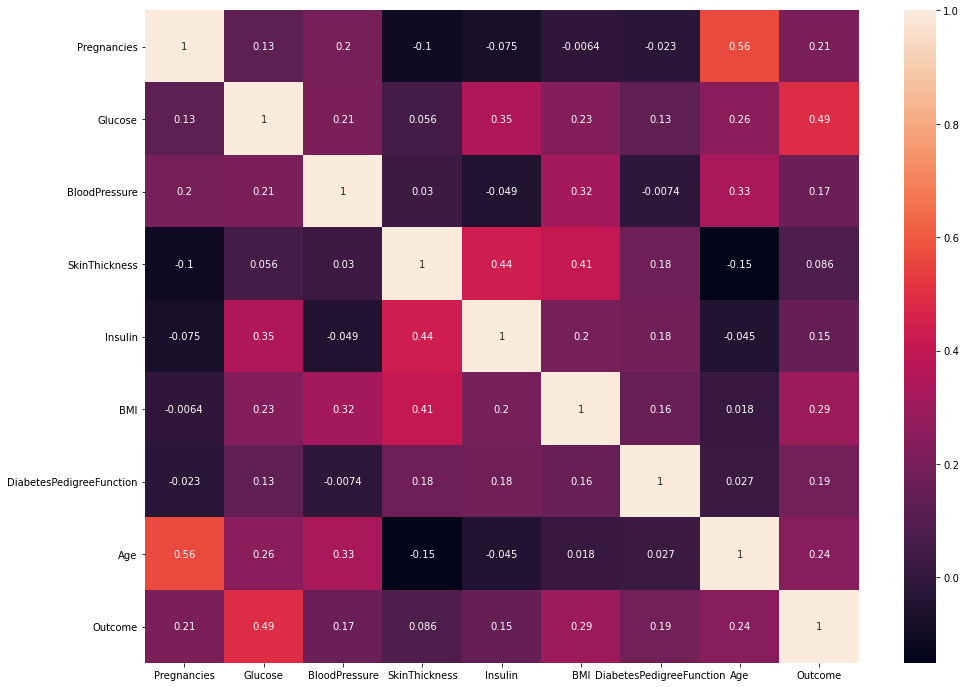

In [76]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), annot=True);

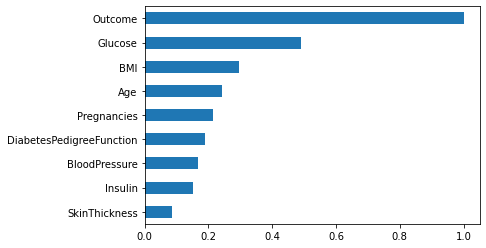

In [77]:
# plt.figure(figsize=(8,6))
df.corr()["Outcome"].sort_values().plot.barh();

In [78]:
df.Outcome.value_counts()

0    468
1    239
Name: Outcome, dtype: int64

## Train Test Split

In [79]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.28, stratify=y, random_state=42)

## Train the Model and Predictions

In [80]:
svm_model = SVC().fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

##  Evaluations

In [81]:
cnf_matrix=confusion_matrix(y_test,y_pred)
print('Confusion Matrix:',*cnf_matrix, sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[122   9]
[35 32]
              precision    recall  f1-score   support

           0       0.78      0.93      0.85       131
           1       0.78      0.48      0.59        67

    accuracy                           0.78       198
   macro avg       0.78      0.70      0.72       198
weighted avg       0.78      0.78      0.76       198



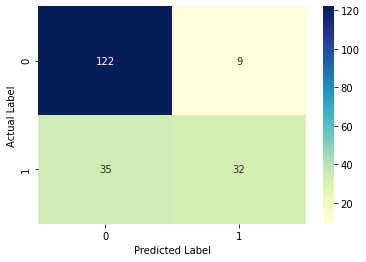

In [82]:
sns.heatmap(cnf_matrix, annot=True, cmap="YlGnBu",fmt='d')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label');

## Standarization-Retrain-Evaluation

In [83]:
from sklearn.preprocessing import scale, StandardScaler

In [84]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [85]:
svm_model = SVC().fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [86]:
cnf_matrix=confusion_matrix(y_test,y_pred)
print('Confusion Matrix:',*cnf_matrix, sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[120  11]
[24 43]
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       131
           1       0.80      0.64      0.71        67

    accuracy                           0.82       198
   macro avg       0.81      0.78      0.79       198
weighted avg       0.82      0.82      0.82       198



## Model Tuning with Gridsearch
* if C=1, soft margin
* if C=1000, hard margin
* C, margine yakinlik veya uzakligina gore ceza verir.
* Gamma buyurse daha kompleks siniflandirici haline gelir ve overfitinge gidebilir.
* rbf kullanilacaksa C ve Gamma optimize edilmelidir. Ozellikle Gamma !
* Gamma buyukse, C onemsiz hale gelir.
* 0.0001 < Gamma < 10  
* 0.1 < C < 100

In [87]:
svm = SVC()

In [88]:
param_grid = {'C': [0.1, 1, 50, 70, 100],
              'gamma': [1,0.1,0.01,0.001,0.0001], 
              'kernel': ['rbf','linear']} 

In [89]:
svm_cv_model = GridSearchCV(svm, param_grid, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    4.4s finished


In [90]:
svm_cv_model.best_params_

{'C': 50, 'gamma': 0.001, 'kernel': 'rbf'}

In [91]:
y_pred = svm_cv_model.predict(X_test)
cnf_matrix=confusion_matrix(y_test,y_pred)
print('Confusion Matrix:',*cnf_matrix, sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[118  13]
[29 38]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       131
           1       0.75      0.57      0.64        67

    accuracy                           0.79       198
   macro avg       0.77      0.73      0.75       198
weighted avg       0.78      0.79      0.78       198



In [92]:
svm_tuned= SVC(C = 50, gamma= 0.001, kernel= 'rbf').fit(X_train, y_train)

In [93]:
y_pred = svm_tuned.predict(X_test)
cnf_matrix=confusion_matrix(y_test,y_pred)
print('Confusion Matrix:',*cnf_matrix, sep="\n")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[118  13]
[29 38]
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       131
           1       0.75      0.57      0.64        67

    accuracy                           0.79       198
   macro avg       0.77      0.73      0.75       198
weighted avg       0.78      0.79      0.78       198

